## Analysing the 2014 LokSabha Election Candidate Details

### By: Rutwik V Jangam

- Load the libraries that we would be using.
- Load the database into data frame candid using read_csv() and view the first 5 rows using head() to let us know if the csv file has been read properly.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
candid=pd.read_csv("LS2014Candidate.csv")
candid.head()

,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position
0,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,GODAM NAGESH,M,ST,49.0,TRS,430847,1
1,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NARESH,M,ST,37.0,INC,259557,2
2,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RAMESH RATHOD,M,ST,48.0,TDP,184198,3
3,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RATHOD SADASHIV,M,ST,55.0,BSP,94420,4
4,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NETHAWATH RAMDAS,M,ST,44.0,IND,41032,5


- Let us now check for the info of the data frame that tells us the count of non-null data for each variable and also it's data type

In [2]:
candid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8794 entries, 0 to 8793
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ST_CODE             8794 non-null   object 
 1   State name          8794 non-null   object 
 2   Month               8794 non-null   int64  
 3   Year                8794 non-null   int64  
 4   PC Number           8794 non-null   int64  
 5   PC name             8794 non-null   object 
 6   PC Type             8794 non-null   object 
 7   Candidate Name      8794 non-null   object 
 8   Candidate Sex       8252 non-null   object 
 9   Candidate Category  8252 non-null   object 
 10  Candidate Age       8252 non-null   float64
 11  Party Abbreviation  8794 non-null   object 
 12  Total Votes Polled  8794 non-null   int64  
 13  Position            8794 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 962.0+ KB


- On the initial glance, we can see that there are a few variables which have null values (542) such as "Candidate Sex", "Candidate Category" and "Candidate Age".
- We can check for the percentage of missing values to confirm if there are any missing values in the dataframe.

In [3]:
round(100*(candid.isnull().sum()/len(candid.index)),2)

ST_CODE               0.00
State name            0.00
Month                 0.00
Year                  0.00
PC Number             0.00
PC name               0.00
PC Type               0.00
Candidate Name        0.00
Candidate Sex         6.16
Candidate Category    6.16
Candidate Age         6.16
Party Abbreviation    0.00
Total Votes Polled    0.00
Position              0.00
dtype: float64

- The same three columns as mentioned earlier have missing values - note that whenever we would use agregate functions over these variables, the missing values would be ignores thus not altering our results.
- Let us now replace the space in the column names with an underscore for easier use in our codes.

In [4]:
candid.columns=candid.columns.str.strip().str.lower().str.replace(" ","_")
candid.columns

Index(['st_code', 'state_name', 'month', 'year', 'pc_number', 'pc_name',
       'pc_type', 'candidate_name', 'candidate_sex', 'candidate_category',
       'candidate_age', 'party_abbreviation', 'total_votes_polled',
       'position'],
      dtype='object')

#### We can create a new column called Age Group since we would be analysing the age of the candidates.
- The bins are as follows - below 35: Young Aged, 35 to 60: Middle Aged, 60 and above: Old Aged

In [5]:
candid.head()

,st_code,state_name,month,year,pc_number,pc_name,pc_type,candidate_name,candidate_sex,candidate_category,candidate_age,party_abbreviation,total_votes_polled,position
0,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,GODAM NAGESH,M,ST,49.0,TRS,430847,1
1,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NARESH,M,ST,37.0,INC,259557,2
2,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RAMESH RATHOD,M,ST,48.0,TDP,184198,3
3,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RATHOD SADASHIV,M,ST,55.0,BSP,94420,4
4,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NETHAWATH RAMDAS,M,ST,44.0,IND,41032,5


In [6]:
bins = [0, 35, 60, 100]
labels = ['Young','Middle-Aged','Old-Aged']
candid['age_Group'] = pd.cut(candid['candidate_age'], bins=bins, labels=labels)
candid[['candidate_age','age_Group']]

,candidate_age,age_Group
0,49.0,Middle-Aged
1,37.0,Middle-Aged
2,48.0,Middle-Aged
3,55.0,Middle-Aged
4,44.0,Middle-Aged
...,...,...
8789,60.0,Middle-Aged
8790,59.0,Middle-Aged
8791,32.0,Young
8792,37.0,Middle-Aged


#### Let us start with the basic interpretations and then move on to complex ones to gain additional insights.
#### 1. Let us now check for the total number of party's contested in the 2014 election

In [7]:
len(candid.party_abbreviation.unique())

466

- Though the output is 466 we need to subtract IND and NOTA, so the total number of party's contested in the 2014 election is 464

#### 2. Let us now check the number of seats in which each of the parties contested.

In [8]:
candid.party_abbreviation.value_counts()

IND      3234
NOTA      543
BSP       503
INC       464
AAAP      432
         ... 
hkd         1
ABMP        1
mmsp        1
BHNKP       1
IBSP        1
Name: party_abbreviation, Length: 466, dtype: int64

- We know that the total number of constituencies are 543. The highest count is of the cummulative independent candidates that indicates that multiple independent candidates contested from the same constituency. The second highest is that of NOTA that indicates that each of the constituencies had an option of NOTA. The party that contested in the highest number of seats is BSP.

#### We can create a seperate data set of the row items that have party as NOTA

In [9]:
candid_nota=candid[candid.party_abbreviation=='NOTA']
candid_nota.head()

,st_code,state_name,month,year,pc_number,pc_name,pc_type,candidate_name,candidate_sex,candidate_category,candidate_age,party_abbreviation,total_votes_polled,position,age_Group
5,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,None of the Above,NaN,NaN,NaN,NOTA,17084,6,NaN
18,S01,Andhra Pradesh,5,2014,2,Peddapalle,SC,None of the Above,NaN,NaN,NaN,NOTA,5361,10,NaN
34,S01,Andhra Pradesh,5,2014,3,Karimnagar,GEN,None of the Above,NaN,NaN,NaN,NOTA,5734,8,NaN
51,S01,Andhra Pradesh,5,2014,4,Nizamabad,GEN,None of the Above,NaN,NaN,NaN,NOTA,7266,7,NaN
67,S01,Andhra Pradesh,5,2014,5,Zahirabad,GEN,None of the Above,NaN,NaN,NaN,NOTA,11190,6,NaN


#### The original dataset can be cleared of NOTA row items

In [10]:
candid=candid[candid.party_abbreviation!='NOTA']
candid.party_abbreviation.value_counts()

IND      3234
BSP       503
INC       464
AAAP      432
BJP       428
         ... 
hkd         1
ABMP        1
mmsp        1
BHNKP       1
RPIE        1
Name: party_abbreviation, Length: 465, dtype: int64

- We can see that the row items for party = NOTA are present in the candid_nota data frame and the candid data fram has no NOTA row items.
- Recheck the percentage of missing values since majority of NaNs seem to be eliminated from candid when candid_nota is created.

In [11]:
round(100*(candid.isnull().sum()/len(candid.index)),2)

st_code               0.0
state_name            0.0
month                 0.0
year                  0.0
pc_number             0.0
pc_name               0.0
pc_type               0.0
candidate_name        0.0
candidate_sex         0.0
candidate_category    0.0
candidate_age         0.0
party_abbreviation    0.0
total_votes_polled    0.0
position              0.0
age_Group             0.0
dtype: float64

- We can see that there are no missing values

#### 3. Let us now check for the spread of age groups variable that we had created.

In [12]:
candid.age_Group.count()

8251

Middle-Aged    66.076839
Young          18.300812
Old-Aged       15.622349
Name: age_Group, dtype: float64

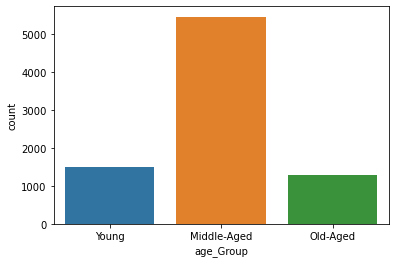

In [13]:
sns.countplot(candid.age_Group)
candid.age_Group.value_counts()/candid.age_Group.count()*100

- We can see that majority of the candidates i.e. 66% belong to the middle aged group (35-60 years) followed by young candidates at 18% and then old aged candidates aat 15.6%

#### We can now create a new column that tells about the count of the number of seats that the party associated with each row-item had contested in.

In [14]:
candid['party_contested_count']=[candid[candid['party_abbreviation']==x].party_abbreviation.count() for x in candid['party_abbreviation']]

#### We can create a new column that tells us about the kind of party the candidate is from: Small sized party(which has contested in a maximum of 50 seats); Medium Sized Party(which has contested in 50 -200 seats); National party(which has contsted in 200 to 550 seats); The only party abbreviation that has more than 550 seat count (3234) is that of the INDEPENDENTS.

In [15]:
bins = [0, 50, 200, 550,5000]
labels = ['Small Sized Party','Medium Sized Party','National Party','Independent Candidates']
candid['Party_Category'] = pd.cut(candid['party_contested_count'], bins=bins, labels=labels)
candid['Party_Category']

0            Small Sized Party
1               National Party
2            Small Sized Party
3               National Party
4       Independent Candidates
                 ...          
8789    Independent Candidates
8790        Medium Sized Party
8791         Small Sized Party
8792        Medium Sized Party
8793    Independent Candidates
Name: Party_Category, Length: 8251, dtype: category
Categories (4, object): ['Small Sized Party' < 'Medium Sized Party' < 'National Party' < 'Independent Candidates']

In [16]:
candid.head()

,st_code,state_name,month,year,pc_number,pc_name,pc_type,candidate_name,candidate_sex,candidate_category,candidate_age,party_abbreviation,total_votes_polled,position,age_Group,party_contested_count,Party_Category
0,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,GODAM NAGESH,M,ST,49.0,TRS,430847,1,Middle-Aged,17,Small Sized Party
1,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NARESH,M,ST,37.0,INC,259557,2,Middle-Aged,464,National Party
2,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RAMESH RATHOD,M,ST,48.0,TDP,184198,3,Middle-Aged,30,Small Sized Party
3,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RATHOD SADASHIV,M,ST,55.0,BSP,94420,4,Middle-Aged,503,National Party
4,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NETHAWATH RAMDAS,M,ST,44.0,IND,41032,5,Middle-Aged,3234,Independent Candidates


#### 4. Let us now check for the spread of party category of the parties that contested in the 2014 elections

In [17]:
len(candid.party_abbreviation.unique())

465

In [18]:
#Small Sized Party
len(candid[candid['Party_Category']=='Small Sized Party']['party_abbreviation'].unique())

450

In [19]:
#Medium Sized Party
len(candid[candid['Party_Category']=='Medium Sized Party']['party_abbreviation'].unique())

9

In [20]:
#Naational Party
len(candid[candid['Party_Category']=='National Party']['party_abbreviation'].unique())

5

- We can see that out of the total 465 parties: 450 are small sized parties that had contested in less than 50 seats; 9 are medium sized parties that had contsted in 50 - 200 seats and 9 National Parties that had contested in more than 200 seats

##### 5. Let us now check the spread of candidate categories in the National Parties since they have contsted across INDIA

GEN    64.660194
SC     25.873786
ST      9.466019
Name: candidate_category, dtype: float64


<AxesSubplot:>

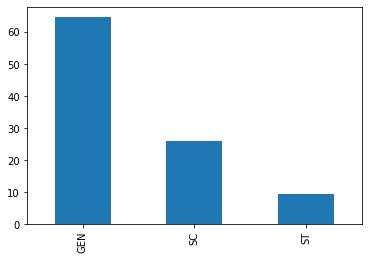

In [21]:
x=candid[candid['Party_Category']=='National Party']['candidate_category'].value_counts()/len(candid[candid['Party_Category']=='National Party'])*100
print(x)
x.plot(kind='bar')

- We can ses that approximately 65% of the candidates who contested in 2014 elections from national parties are of General Category; almost 26% of these national party candidates are of SC category and the remaining 9% are of the ST category.

#### 6. Is there any relation between the age group within which the candidate falls and the cumulative votes that has been polled against them ?

In [22]:
candid.groupby(by=['age_Group']).mean()['total_votes_polled']

age_Group
Young           26045.933113
Middle-Aged     65161.011555
Old-Aged       118861.761055
Name: total_votes_polled, dtype: float64

- Though unconclusive, on an average we can say that Old-Aged candidates gain higher number of votes, this can be due to the candidate being a well-seasoned politician and one who has contested in multiple elections before. On the other hand, young contestants gain less number of votes on an average when compared to middle and old aged contestants. This can be due to the reason that these candidates are new to politics and are yet to make a place for themselves amongst the leaders. Majority of the Independent candidates might also be young since they would not have affiliation towards any party and thus gain lesser number of votes.

#### 7. This brings us to the next question, Are most of the Independent candidates younger ?

In [23]:
candid.head()

,st_code,state_name,month,year,pc_number,pc_name,pc_type,candidate_name,candidate_sex,candidate_category,candidate_age,party_abbreviation,total_votes_polled,position,age_Group,party_contested_count,Party_Category
0,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,GODAM NAGESH,M,ST,49.0,TRS,430847,1,Middle-Aged,17,Small Sized Party
1,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NARESH,M,ST,37.0,INC,259557,2,Middle-Aged,464,National Party
2,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RAMESH RATHOD,M,ST,48.0,TDP,184198,3,Middle-Aged,30,Small Sized Party
3,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RATHOD SADASHIV,M,ST,55.0,BSP,94420,4,Middle-Aged,503,National Party
4,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NETHAWATH RAMDAS,M,ST,44.0,IND,41032,5,Middle-Aged,3234,Independent Candidates


Middle-Aged    65.708101
Young          23.469388
Old-Aged       10.822511
Name: age_Group, dtype: float64


<AxesSubplot:>

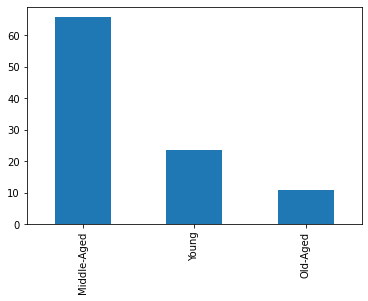

In [24]:
x=candid[candid['party_abbreviation']=='IND']['age_Group'].value_counts()/len(candid[candid['party_abbreviation']=='IND'])*100
print(x)
x.plot(kind='bar')

- Surprisingly not, Majority of the independent candidates are middle-aged at 66%, while young aged candidates make up only 23% of the total independent candidates. Only 10% of the Independent candidates are old-aged.

#### 8. Let us now check the age group of candidates who have won the seat from which they had contested in i.e. the age group composition of the Lok Sabha post the election results

Middle-Aged    350
Old-Aged       159
Young           34
Name: age_Group, dtype: int64


([<matplotlib.patches.Wedge at 0x27a95a57348>,
 [Text(-0.48258947940846947, 0.9884874275195729, 'Middle-Aged'),
  Text(0.28008761062503323, -1.0637438274200983, 'Young'),
  Text(1.0787861064548843, -0.2149896195631577, 'Old-Aged')],
 [Text(-0.2632306251318924, 0.5391749604652215, '64.5%'),
  Text(0.15277506034092722, -0.5802239058655081, '29.3%'),
  Text(0.5884287853390278, -0.11726706521626781, '6.3%')])

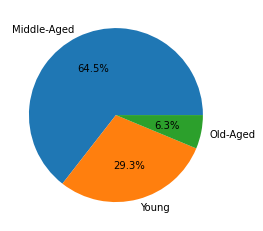

In [25]:
x=candid[candid['position']==1]['age_Group'].value_counts()
print(x)
plt.pie(x,labels=candid.age_Group.unique(),autopct='%1.1f%%')

- We can see that majority of the winners are middle aged candidates i.e. almost 65%, while young aged candidates make up 29% of the winners and old-aged candidates are only 6.3% of the total election winners.

#### 9. What is the average difference of the total number of votes between the winner and the runner up in all the constituency

In [26]:
winner=candid[candid['position']==1]['total_votes_polled']
winner.reset_index(drop=True, inplace=True)
winner

0      430847
1      565496
2      505358
3      439307
4      508661
        ...  
538    629860
539    651395
540    497980
541     21665
542    255826
Name: total_votes_polled, Length: 543, dtype: int64

In [27]:
runner_up=candid[candid['position']==2]['total_votes_polled']
runner_up.reset_index(drop=True, inplace=True)
runner_up

0      259557
1      274338
2      300706
3      272123
4      364030
        ...  
538    523058
539    382809
540    390980
541     20130
542    194972
Name: total_votes_polled, Length: 543, dtype: int64

In [28]:
(winner-runner_up).mean()

155586.2670349908

- On an average the winner from a constituency won the election by a margin of 1,55,586 votes
- Let us check for the spread of the difference of total votes

count       543.000000
mean     155586.267035
std      111365.746593
min          36.000000
25%       69769.000000
50%      138180.000000
75%      222684.000000
max      570128.000000
Name: total_votes_polled, dtype: float64


<AxesSubplot:>

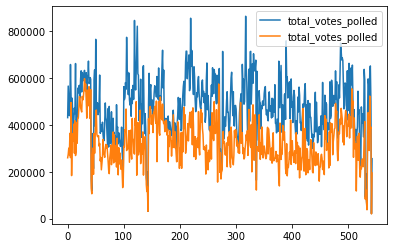

In [29]:
print((winner-runner_up).describe())
pd.concat([winner,runner_up],axis=1).plot()

- We can see that the minimum difference between the winner and the runner up for the elections was only 36 votes where as the maximum is approximately 6 Lakh votes. This tells us that the spectrum of vitory margins has a large spread.

#### 10. Let us now check for which of the constituencies has the youngest winner and which one has the oldest winner
- Youngest winner first

In [30]:
candid[(candid['position']==1)&(candid['candidate_age']==candid[candid['position']==1]['candidate_age'].min())]

,st_code,state_name,month,year,pc_number,pc_name,pc_type,candidate_name,candidate_sex,candidate_category,candidate_age,party_abbreviation,total_votes_polled,position,age_Group,party_contested_count,Party_Category
1914,S07,Haryana,5,2014,4,Hisar,GEN,DUSHYANT CHAUTALA,M,GEN,26.0,INLD,494478,1,Young,10,Small Sized Party
3380,S13,Maharashtra,5,2014,1,Nandurbar,ST,DR.GAVIT HEENA VIJAYKUMAR,F,ST,26.0,BJP,579486,1,Young,428,National Party
3431,S13,Maharashtra,5,2014,4,Raver,GEN,KHADASE RAKSHA NIKHIL,F,GEN,26.0,BJP,605452,1,Young,428,National Party
5256,S22,Tamil Nadu,5,2014,3,Chennai South,GEN,DR. J. JAYAVARDHAN,M,GEN,26.0,ADMK,434540,1,Young,40,Small Sized Party
7723,S25,West Bengal,5,2014,21,Diamond harbour,GEN,ABHISHEK BANERJEE,M,GEN,26.0,AITC,508481,1,Young,131,Medium Sized Party


- We can see that there are 5 winners who are youngest i.e. aged 26 years; from all the winners from the elections. These young winners are spread across 4 states with 2 of them representing a National Party i.e. BJP.
- Let us now check for the oldest winner

In [31]:
candid[(candid['position']==1)&(candid['candidate_age']==candid[candid['position']==1]['candidate_age'].max())]

,st_code,state_name,month,year,pc_number,pc_name,pc_type,candidate_name,candidate_sex,candidate_category,candidate_age,party_abbreviation,total_votes_polled,position,age_Group,party_contested_count,Party_Category
1559,S06,Gujarat,5,2014,6,Gandhinagar,GEN,L.K.ADVANI,M,GEN,86.0,BJP,773539,1,Old-Aged,428,National Party


- The oldest winner is L.K.Advani aged 86 years, from Gandhinagar constituency belonging to the BJP.

#### 11. Let us now deep dive into the two major parties in India i.e. the BJP and  Congress. Let us check the how they fare in terms of gender inclusion.

In [32]:
NP=candid[(candid['party_abbreviation']=='BJP') | (candid['party_abbreviation']=='INC')]
NP.groupby(by=['party_abbreviation','candidate_sex']).count()['year']#year used just for neat representation

party_abbreviation  candidate_sex
BJP                 F                 38
                    M                390
INC                 F                 60
                    M                404
Name: year, dtype: int64

- We can see that both the national parties had low number of female candidates, compared to the male candidates constest in the 2014 elections

#### 12.  Let us check the how these two National parties fare in terms of candidate categories.

In [33]:
NP.groupby(by=['party_abbreviation','candidate_category']).count()['year']#year used just for neat representation

party_abbreviation  candidate_category
BJP                 GEN                   318
                    SC                     64
                    ST                     46
INC                 GEN                   337
                    SC                     78
                    ST                     49
Name: year, dtype: int64

- The spread is approximately the same for both the parties, this might be due to the rule that cenrtain parliamentary constituencies are reserved for certain category candidates i.e. no other category candidate can contest is such constituency.

#### 13. Let us now check for the party that won highest number of seats in each of the states along with the number of seats that the party has won.

In [34]:
win=candid[candid['position']==1]
win.groupby(by=['state_name','party_abbreviation']).count().sort_values(by=['st_code'],ascending=False).groupby(level=0).head(1)['st_code'].to_frame()
#st_code used just for neat representation

,,st_code
state_name,party_abbreviation,
Uttar Pradesh,BJP,71
Tamil Nadu,ADMK,37
West Bengal,AITC,34
Madhya Pradesh,BJP,27
Gujarat,BJP,26
Rajasthan,BJP,25
Maharashtra,BJP,23
Bihar,BJP,22
Odisha,BJD,20


- We can see that each of the states have the party with most number of seats mentioned alongside. The last few row items thaat have the count of seats as 1 are mostly from the Union Territories.

#### 14. Let us now check the minimum margins of victory(difference between the winner and runnerup) for each of the states

- We will be electing only the state_name, pc_name and the total_votes polled columns
- We will have to create a new column by concatenating the state and pc_name since Aurangabad occurs in two states i.e. Bihar and Maharashtra. Doing an inner join without treating this would cause duplicate row items in the merged table.

In [35]:
winner=candid[candid['position']==1][['state_name','pc_name','total_votes_polled']]
winner.reset_index(drop=True, inplace=True)
winner['constituency_name']=winner['state_name']+"_"+winner['pc_name']
winner

,state_name,pc_name,total_votes_polled,constituency_name
0,Andhra Pradesh,Adilabad,430847,Andhra Pradesh_Adilabad
1,Andhra Pradesh,Peddapalle,565496,Andhra Pradesh_Peddapalle
2,Andhra Pradesh,Karimnagar,505358,Andhra Pradesh_Karimnagar
3,Andhra Pradesh,Nizamabad,439307,Andhra Pradesh_Nizamabad
4,Andhra Pradesh,Zahirabad,508661,Andhra Pradesh_Zahirabad
...,...,...,...,...
538,NCT OF Delhi,NORTH WEST DELHI,629860,NCT OF Delhi_NORTH WEST DELHI
539,NCT OF Delhi,WEST DELHI,651395,NCT OF Delhi_WEST DELHI
540,NCT OF Delhi,SOUTH DELHI,497980,NCT OF Delhi_SOUTH DELHI
541,Lakshadweep,Lakshadweep,21665,Lakshadweep_Lakshadweep


- For the runnersup, position=2

In [36]:
runner_up=candid[candid['position']==2][['state_name','pc_name','total_votes_polled']]
runner_up.reset_index(drop=True, inplace=True)
runner_up['constituency_name']=runner_up['state_name']+"_"+runner_up['pc_name']
runner_up

,state_name,pc_name,total_votes_polled,constituency_name
0,Andhra Pradesh,Adilabad,259557,Andhra Pradesh_Adilabad
1,Andhra Pradesh,Peddapalle,274338,Andhra Pradesh_Peddapalle
2,Andhra Pradesh,Karimnagar,300706,Andhra Pradesh_Karimnagar
3,Andhra Pradesh,Nizamabad,272123,Andhra Pradesh_Nizamabad
4,Andhra Pradesh,Zahirabad,364030,Andhra Pradesh_Zahirabad
...,...,...,...,...
538,NCT OF Delhi,NORTH WEST DELHI,523058,NCT OF Delhi_NORTH WEST DELHI
539,NCT OF Delhi,WEST DELHI,382809,NCT OF Delhi_WEST DELHI
540,NCT OF Delhi,SOUTH DELHI,390980,NCT OF Delhi_SOUTH DELHI
541,Lakshadweep,Lakshadweep,20130,Lakshadweep_Lakshadweep


- An inner merge is performed on the constituency_name column to avoid any redundancy.

In [37]:
diff=winner.merge(runner_up,how='inner', on='constituency_name')[['state_name_x','constituency_name','total_votes_polled_x','total_votes_polled_y']]
diff

,state_name_x,constituency_name,total_votes_polled_x,total_votes_polled_y
0,Andhra Pradesh,Andhra Pradesh_Adilabad,430847,259557
1,Andhra Pradesh,Andhra Pradesh_Peddapalle,565496,274338
2,Andhra Pradesh,Andhra Pradesh_Karimnagar,505358,300706
3,Andhra Pradesh,Andhra Pradesh_Nizamabad,439307,272123
4,Andhra Pradesh,Andhra Pradesh_Zahirabad,508661,364030
...,...,...,...,...
538,NCT OF Delhi,NCT OF Delhi_NORTH WEST DELHI,629860,523058
539,NCT OF Delhi,NCT OF Delhi_WEST DELHI,651395,382809
540,NCT OF Delhi,NCT OF Delhi_SOUTH DELHI,497980,390980
541,Lakshadweep,Lakshadweep_Lakshadweep,21665,20130


In [38]:
diff['difference']=diff.total_votes_polled_x-diff.total_votes_polled_y
diff

,state_name_x,constituency_name,total_votes_polled_x,total_votes_polled_y,difference
0,Andhra Pradesh,Andhra Pradesh_Adilabad,430847,259557,171290
1,Andhra Pradesh,Andhra Pradesh_Peddapalle,565496,274338,291158
2,Andhra Pradesh,Andhra Pradesh_Karimnagar,505358,300706,204652
3,Andhra Pradesh,Andhra Pradesh_Nizamabad,439307,272123,167184
4,Andhra Pradesh,Andhra Pradesh_Zahirabad,508661,364030,144631
...,...,...,...,...,...
538,NCT OF Delhi,NCT OF Delhi_NORTH WEST DELHI,629860,523058,106802
539,NCT OF Delhi,NCT OF Delhi_WEST DELHI,651395,382809,268586
540,NCT OF Delhi,NCT OF Delhi_SOUTH DELHI,497980,390980,107000
541,Lakshadweep,Lakshadweep_Lakshadweep,21665,20130,1535


In [39]:
diff.groupby(by=['state_name_x']).min()['difference']

state_name_x
Andaman & Nicobar Islands      7812
Andhra Pradesh                 2590
Arunachal Pradesh             12478
Assam                         22884
Bihar                          6872
Chandigarh                    69642
Chattisgarh                    1217
Dadra & Nagar Haveli           6214
Daman & Diu                    9222
Goa                           32330
Gujarat                       63426
Haryana                       31847
Himachal Pradesh              39856
Jammu & Kashmir                  36
Jharkhand                      6489
Karnataka                      1499
Kerala                         3306
Lakshadweep                    1535
Madhya Pradesh                 8688
Maharashtra                    1632
Manipur                       15637
Meghalaya                     39716
Mizoram                        6154
NCT OF Delhi                 106802
Nagaland                     400225
Odisha                         2042
Puducherry                    60854
Punjab         

- Along with the least differences between the winner and runner up for each of the states, we can also notice the minimum difference of 36 votes was for the state of Jammu and Kashmir as seen in earlier interpretations.

#### Finally, let us now check the maximum margins of victory(difference between the winner and runnerup) for each of the states

In [40]:
diff.groupby(by=['state_name_x']).max()['difference']

state_name_x
Andaman & Nicobar Islands      7812
Andhra Pradesh               397029
Arunachal Pradesh             41738
Assam                        355779
Bihar                        286936
Chandigarh                    69642
Chattisgarh                  235911
Dadra & Nagar Haveli           6214
Daman & Diu                    9222
Goa                          105599
Gujarat                      570128
Haryana                      466873
Himachal Pradesh             170072
Jammu & Kashmir              257280
Jharkhand                    292954
Karnataka                    363305
Kerala                       194739
Lakshadweep                    1535
Madhya Pradesh               466901
Maharashtra                  446582
Manipur                       94674
Meghalaya                     40379
Mizoram                        6154
NCT OF Delhi                 268586
Nagaland                     400225
Odisha                       320271
Puducherry                    60854
Punjab         

- Along with the highest differences between the winner and runner up for each of the states, we can also notice the maximum difference of all states of 570128 votes was for the state of Gujarat as seen in earlier interpretations.

##### The end